In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv("hangboard_data.csv")
data.head()

,day,date,set,arm,position,duration(sec),size(mm)
0,1,2022-12-23,1,left,straight,1.30,22
1,1,2022-12-23,1,right,straight,0.80,22
2,1,2022-12-23,2,left,straight,1.70,22
3,1,2022-12-23,2,right,straight,2.46,22
4,1,2022-12-23,3,left,straight,2.02,22


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            36 non-null     int64  
 1   date           36 non-null     object 
 2   set            36 non-null     int64  
 3   arm            36 non-null     object 
 4   position       36 non-null     object 
 5   duration(sec)  36 non-null     float64
 6   size(mm)       36 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ KB


# Handling dtypes

In [36]:
def dtype(arg):
    data[arg] = data[arg].astype('string')
dtype('arm')
dtype('position')
data['date'] = pd.to_datetime(data['date'])


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   day            36 non-null     int64         
 1   date           36 non-null     datetime64[ns]
 2   set            36 non-null     int64         
 3   arm            36 non-null     string        
 4   position       36 non-null     string        
 5   duration(sec)  36 non-null     float64       
 6   size(mm)       36 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), string(2)
memory usage: 2.1 KB


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,36.0,1.5000,0.507093,1.0,1.0000,1.500,2.000,2.00
set,36.0,2.0000,0.828079,1.0,1.0000,2.000,3.000,3.00
duration(sec),36.0,2.4175,1.469426,0.8,1.5425,2.025,2.795,7.35
size(mm),36.0,22.0000,0.000000,22.0,22.0000,22.000,22.000,22.00


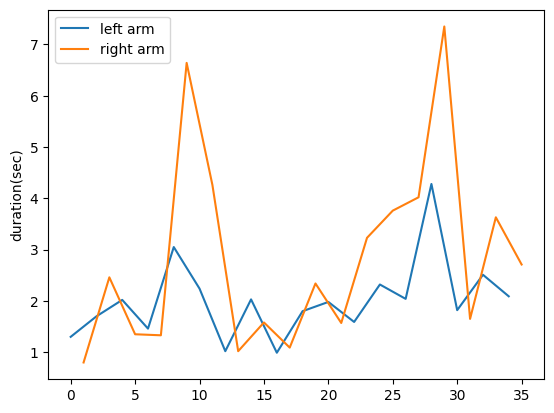

In [14]:
data.groupby('arm')['duration(sec)'].plot();
plt.ylabel('duration(sec)');
plt.legend(['left arm', 'right arm']);

# Comparing arm capacity

In [15]:
left_hang = data[data['arm']== 'left']
left_hang['duration(sec)'].sum()

36.239999999999995

In [16]:
right_hang = data[data['arm']== 'right']
right_hang['duration(sec)'].sum()

50.790000000000006

In [17]:
left_hang = data[data['arm']== 'right']
left_hang

,day,date,set,arm,position,duration(sec),size(mm)
1,1,2022-12-23,1,right,straight,0.80,22
3,1,2022-12-23,2,right,straight,2.46,22
5,1,2022-12-23,3,right,straight,1.35,22
7,1,2022-12-23,1,right,bent,1.33,22
9,1,2022-12-23,2,right,bent,6.64,22
11,1,2022-12-23,3,right,bent,4.26,22
13,1,2022-12-23,1,right,lockoff,1.02,22
15,1,2022-12-23,2,right,lockoff,1.58,22
17,1,2022-12-23,3,right,lockoff,1.09,22
19,2,2022-12-26,1,right,straight,2.34,22


In [22]:
lh = left_hang.groupby(['position', 'duration(sec)'])
lh.head()

,day,date,set,arm,position,duration(sec),size(mm)
1,1,2022-12-23,1,right,straight,0.80,22
3,1,2022-12-23,2,right,straight,2.46,22
5,1,2022-12-23,3,right,straight,1.35,22
7,1,2022-12-23,1,right,bent,1.33,22
9,1,2022-12-23,2,right,bent,6.64,22
11,1,2022-12-23,3,right,bent,4.26,22
13,1,2022-12-23,1,right,lockoff,1.02,22
15,1,2022-12-23,2,right,lockoff,1.58,22
17,1,2022-12-23,3,right,lockoff,1.09,22
19,2,2022-12-26,1,right,straight,2.34,22


In [19]:
right_hang = data[data['arm']== 'right']
right_hang

,day,date,set,arm,position,duration(sec),size(mm)
1,1,2022-12-23,1,right,straight,0.80,22
3,1,2022-12-23,2,right,straight,2.46,22
5,1,2022-12-23,3,right,straight,1.35,22
7,1,2022-12-23,1,right,bent,1.33,22
9,1,2022-12-23,2,right,bent,6.64,22
11,1,2022-12-23,3,right,bent,4.26,22
13,1,2022-12-23,1,right,lockoff,1.02,22
15,1,2022-12-23,2,right,lockoff,1.58,22
17,1,2022-12-23,3,right,lockoff,1.09,22
19,2,2022-12-26,1,right,straight,2.34,22


In [23]:
rh = right_hang.groupby(['position', 'duration(sec)'])
rh.head()

,day,date,set,arm,position,duration(sec),size(mm)
1,1,2022-12-23,1,right,straight,0.80,22
3,1,2022-12-23,2,right,straight,2.46,22
5,1,2022-12-23,3,right,straight,1.35,22
7,1,2022-12-23,1,right,bent,1.33,22
9,1,2022-12-23,2,right,bent,6.64,22
11,1,2022-12-23,3,right,bent,4.26,22
13,1,2022-12-23,1,right,lockoff,1.02,22
15,1,2022-12-23,2,right,lockoff,1.58,22
17,1,2022-12-23,3,right,lockoff,1.09,22
19,2,2022-12-26,1,right,straight,2.34,22
